# Importing dependencies 

In [1]:
import pandas as pd
import pandas_datareader.data as web
from IPython.display import display
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
plt.rcParams.update({'figure.max_open_warning': 0})
from scipy.stats.stats import pearsonr   
%matplotlib inline
from pylab import rcParams
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
plt.style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None

# Importing max historical data for SPY

In [2]:
symbol = 'SPY'
start = datetime(1990, 1, 1)
end = pd.datetime.now()
data = web.DataReader(symbol,'yahoo', start=start, end=end)[['Adj Close']]
data = data.pct_change()
data.head()

,Adj Close
Date,
1993-01-29,NaN
1993-02-01,0.007112
1993-02-02,0.002118
1993-02-03,0.010572
1993-02-04,0.004185


In [3]:
# dimensionality of the DataFrame by (rows,columns)
data.shape

(6565, 1)

In [4]:
data.dropna(inplace=True)

#  Writing a function to look for a cross-correlation between the last N (user input) trading days and  the historical data  

In [5]:
# def corr_window (data, cdw, dyf, corr_level):
    
'''
data = historical data
cdw = corralation days window
dyf = number of days forward
corr_level = minimum desirable correlation level
'''

cdw = 70
dyf = 10
corr_level = 0.4


mylabels = ['Spy', str(dyf)+' days forward']
corr_dict={}

for x in range(cdw,18,-1):
    
    data2= data[-x:]
    corr_level = 0.1
    for i in range(len(data)-x*2):
        if (pearsonr(data[i:i+x],data2)[0]) > corr_level:
            corr_level = (pearsonr(data[i:i+x],data2)[0])
            a = data[i:i+x+dyf]
            b = data[i:i+x+dyf]
    corr_dict[x] = {'corr:':corr_level, "corr_data":a}


            


In [6]:
temp_date=[]
new_corr_dict={}
for i in corr_dict.keys():
    if corr_dict[i]['corr_data'].index[-1] in temp_date:
        pass
    else:
        temp_date.append(corr_dict[i]['corr_data'].index[-1])
        new_corr_dict[i] = corr_dict[i]

## Part of a script for Pattern matching (returns correlation analysis) between last N trading days with it's historical data, with X (user input) historical trading days forward.

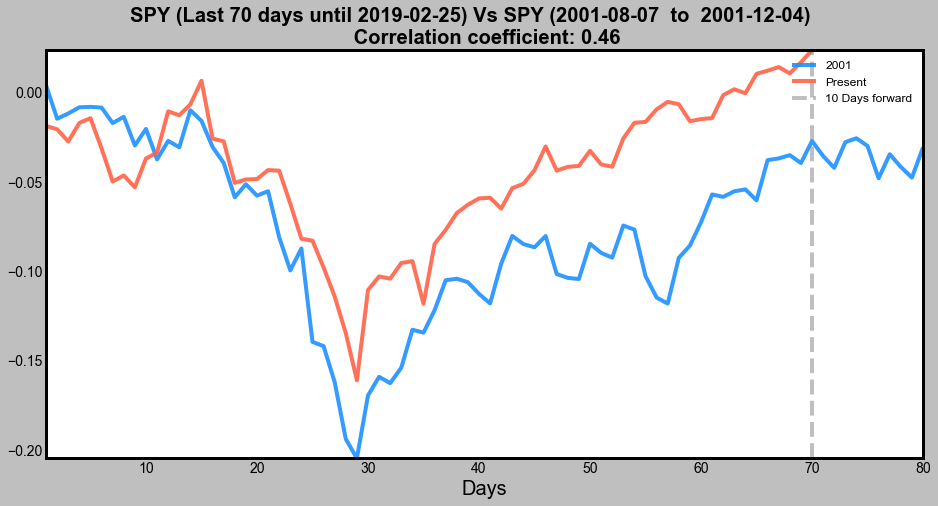

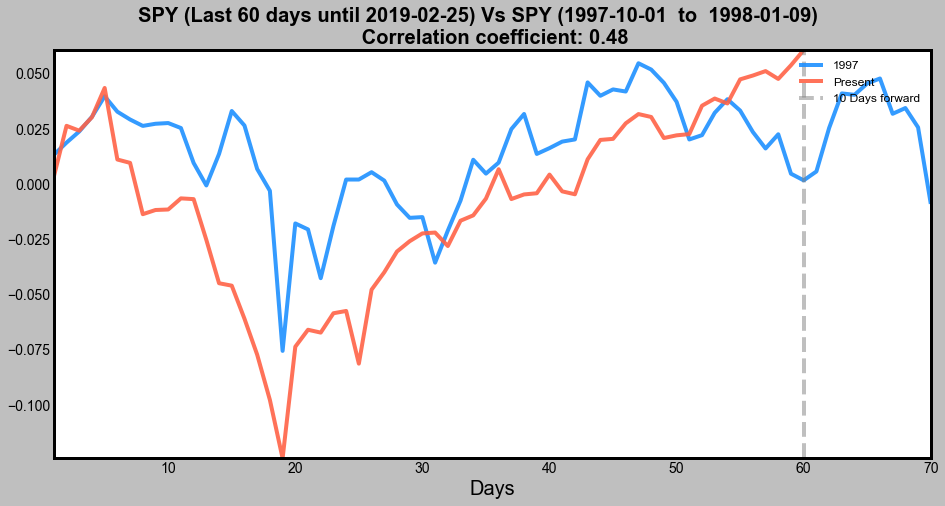

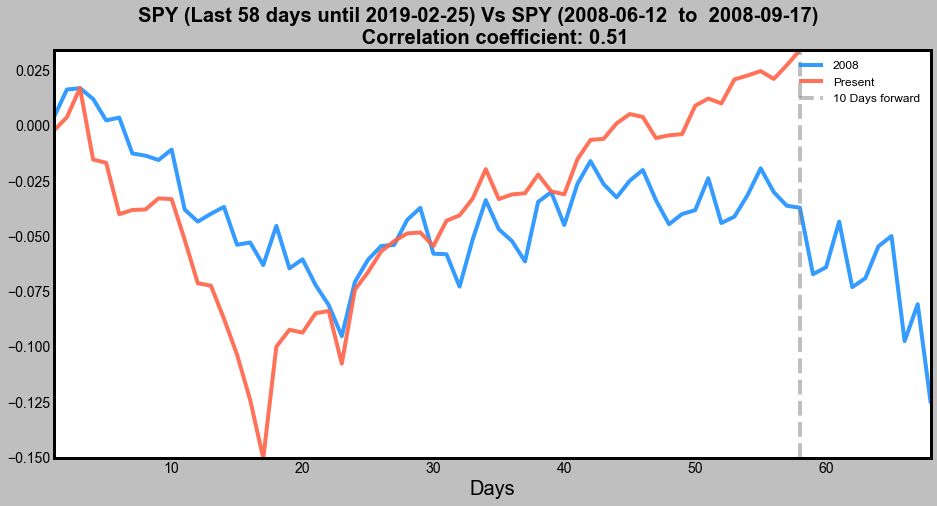

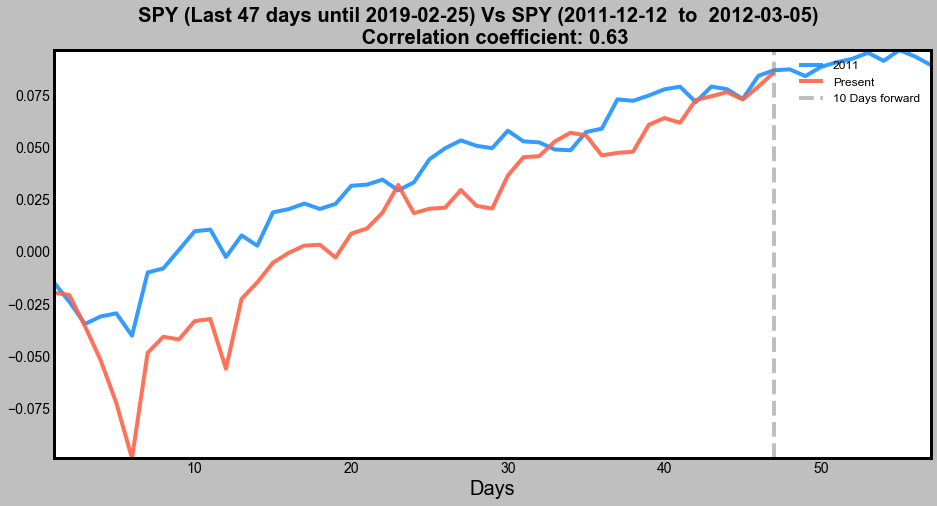

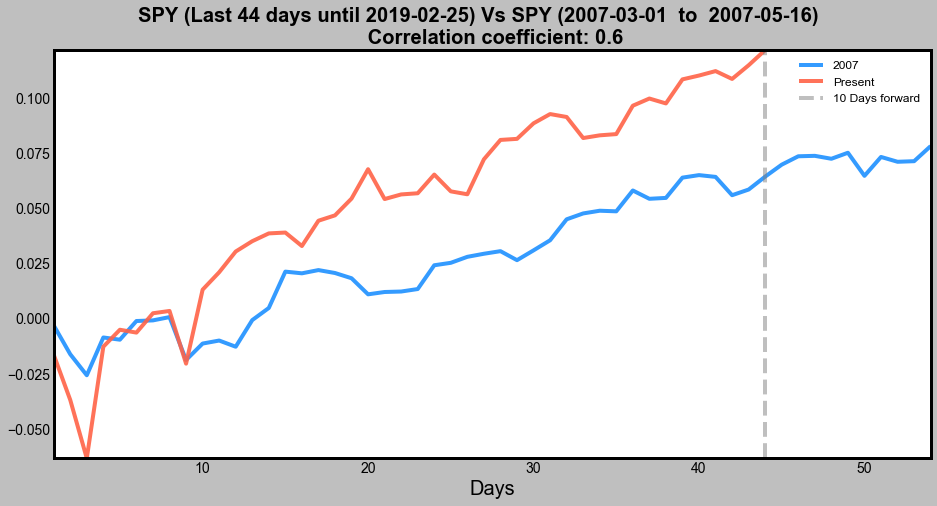

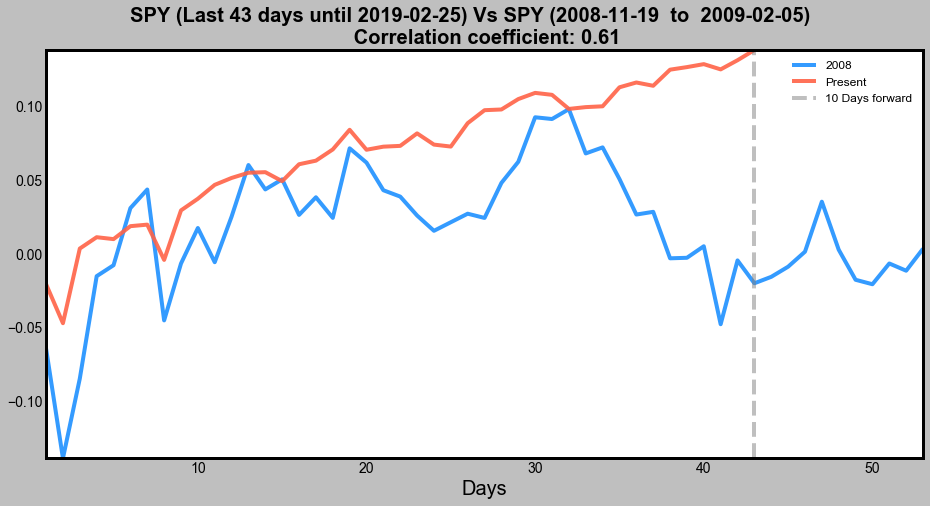

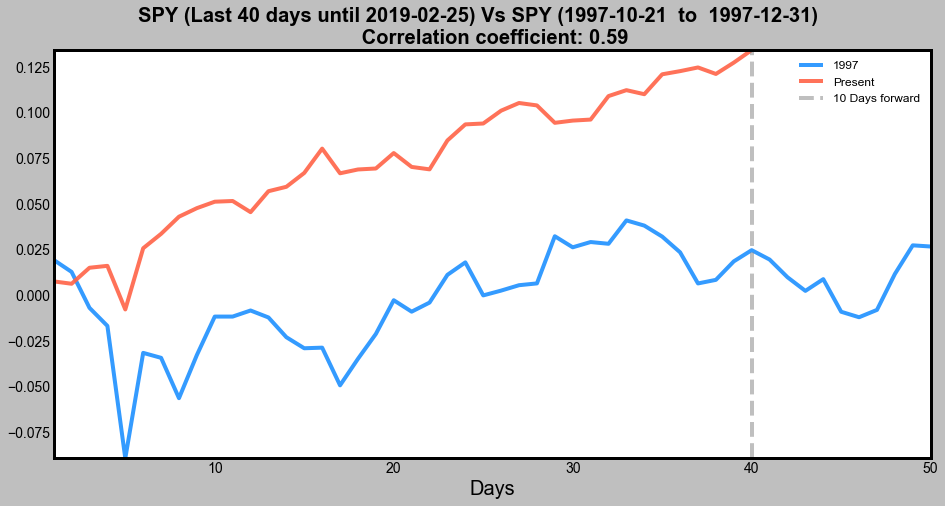

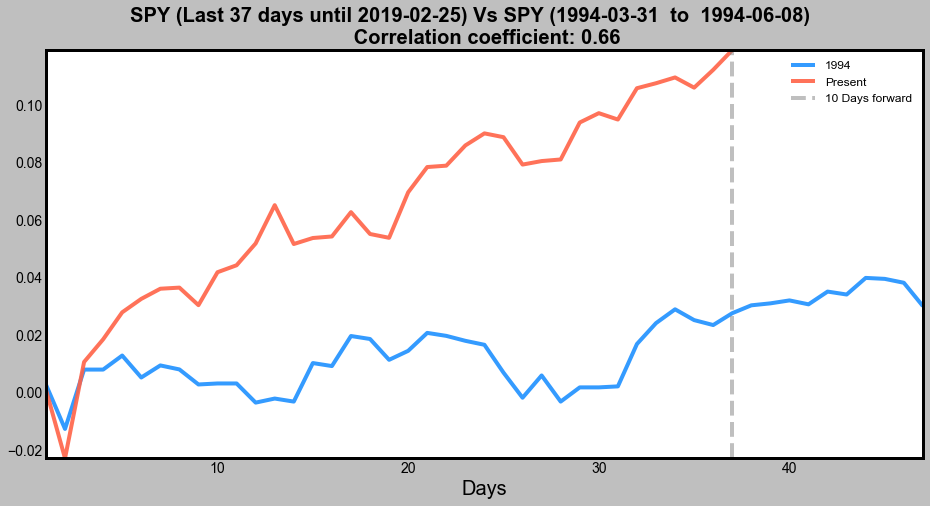

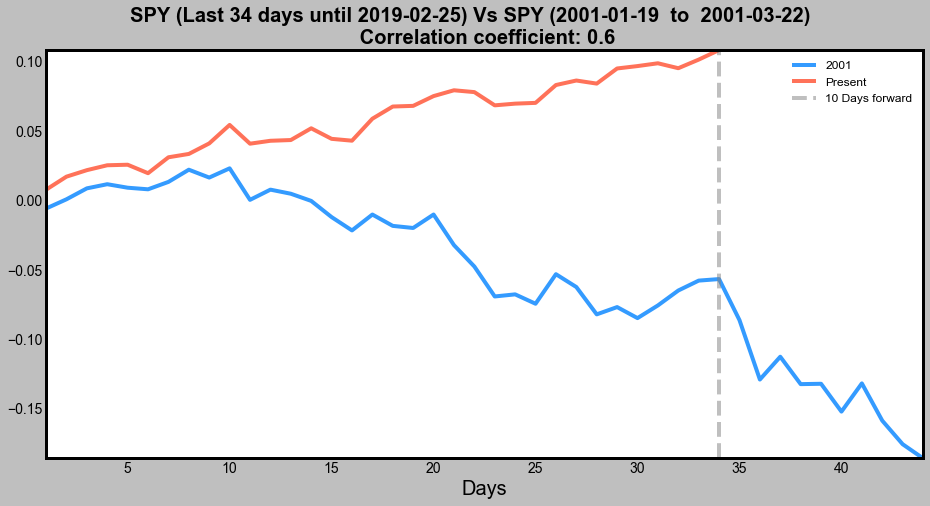

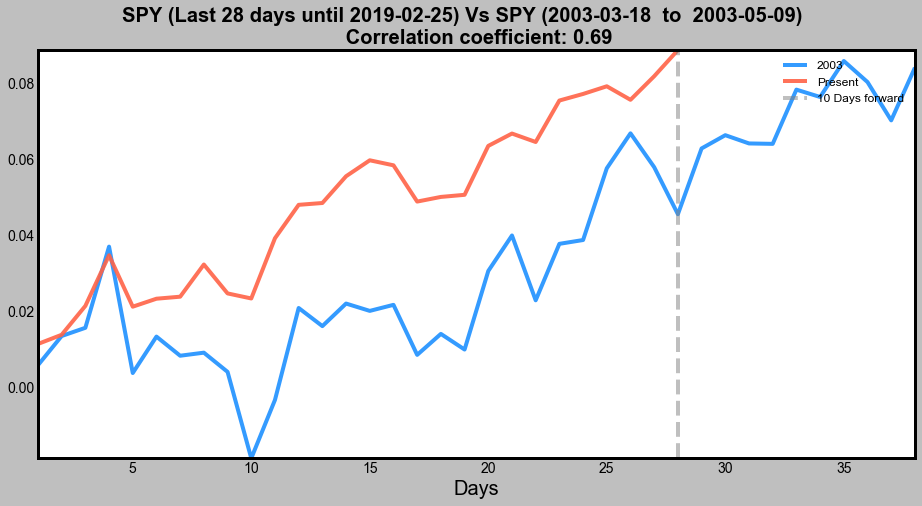

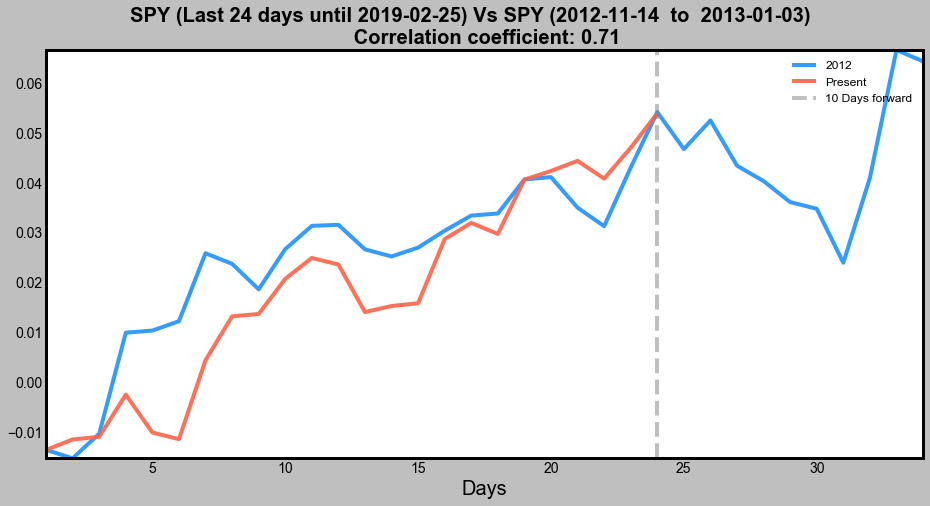

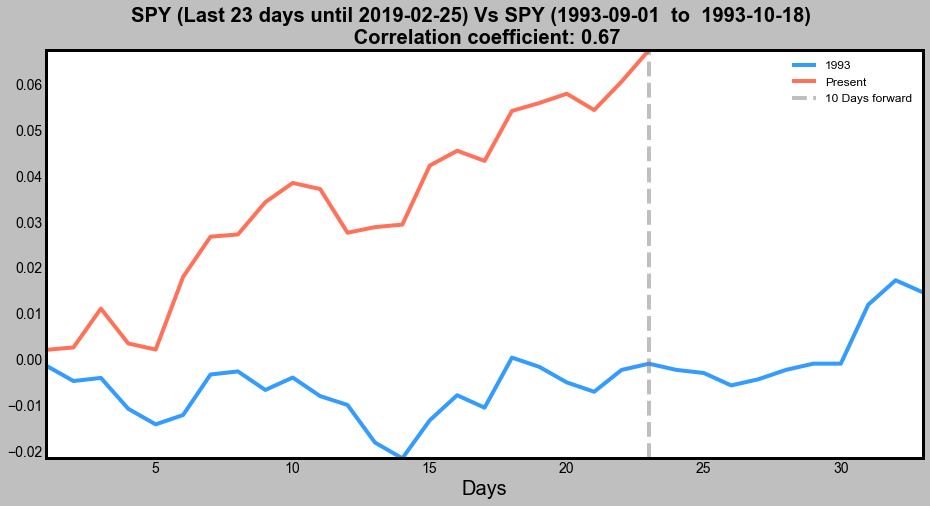

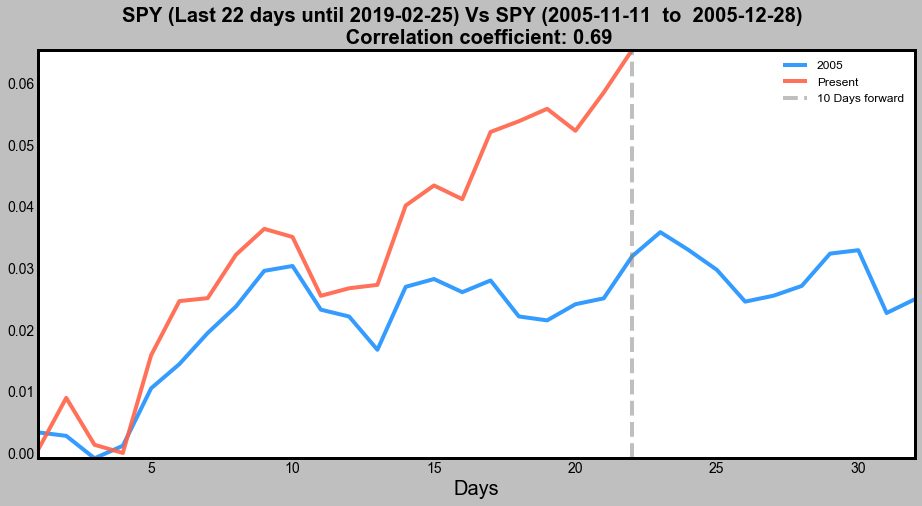

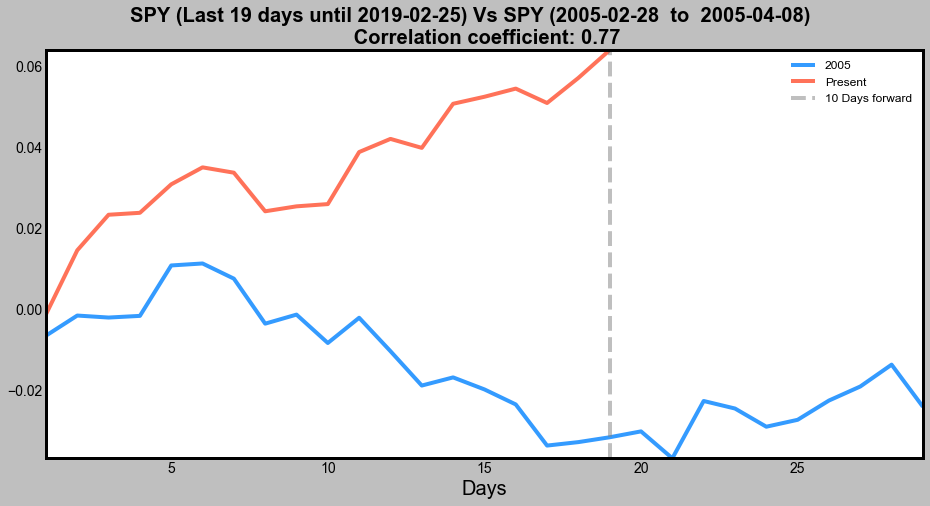

In [7]:
for i in new_corr_dict.keys():
    
    t = new_corr_dict[i]["corr_data"]
    t_start_date = new_corr_dict[i]["corr_data"].index[0].date()
    t_end_date = str(new_corr_dict[i]["corr_data"].index[-1].date())
    year_date = new_corr_dict[i]["corr_data"].index[0].year
    t.reset_index(drop=True, inplace=True)
    t.index = np.arange(1, len(t) + 1)
    data_returns = data[-i:]
    data_returns.reset_index(drop=True, inplace=True)
    data_returns.index = np.arange(1, len(data_returns) + 1)
    t['Present'] = data_returns['Adj Close'][:i+1]
    colors=['dodgerblue','tomato']
    plt.style.use('grayscale')
    t.cumsum().plot(figsize=(14,7), color=colors, alpha=0.9, lw=4)
    date_text = f'{symbol} (Last {i} days until {(data.index[-1].date())}) Vs {symbol} ({t_start_date}  to  {t_end_date}) \
    \n Correlation coefficient: {new_corr_dict[i]["corr:"][0].round(2)}'
    plt.axvline(i,color='gray', linestyle='--', alpha=0.5)
    plt.xlabel("Days", size=20)
    plt.title(date_text, fontweight='bold')
    plt.legend([f'{year_date}','Present',f"{dyf} Days forward"], loc=1, fontsize=12);
    plt.grid();